In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
data = pd.read_csv('Boston_Data_Clean.csv', index_col=0)
data.head()

C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber


# Data Prep and Scaling

In [17]:
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time'] = pd.to_datetime(data['end_time'])

In [18]:
# Trip length
delta = pd.DataFrame({'time_delta': data['end_time'] - data['start_time']})
delta

,time_delta
0,0 days 00:05:51
1,0 days 00:14:51
2,0 days 00:27:53
3,0 days 00:12:28
4,0 days 00:10:22
...,...
1313769,0 days 00:04:09
1313770,0 days 00:04:22
1313771,0 days 00:16:24
1313772,0 days 00:29:11


In [19]:
# Conversion into minutes
trip_length = delta['time_delta'].dt.components[['days', 'hours', 'minutes']]
trip_length_df = pd.DataFrame({'trip_length_min': trip_length['days'] * 24 * 60 + trip_length['hours'] * 60 + trip_length['minutes']})
trip_length_df

,trip_length_min
0,5
1,14
2,27
3,12
4,10
...,...
1313769,4
1313770,4
1313771,16
1313772,29


In [20]:
# Join trip length to cleaned data
joined_data = data.join(trip_length_df, how='outer')
joined_data

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_length_min
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,5
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,14
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,27
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,12
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,10
...,...,...,...,...,...,...,...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber,4
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber,4
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber,16
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber,29


In [21]:
date_info = pd.Series(data['start_time'])
date_info_df = pd.DataFrame({'month': date_info.dt.month, 'day_of_week': date_info.dt.day_of_week, 'start_time_minutes': 60 * date_info.dt.hour + date_info.dt.minute})
date_info_df

,month,day_of_week,start_time_minutes
0,1,6,6
1,1,6,13
2,1,6,16
3,1,6,21
4,1,6,30
...,...,...,...
1313769,12,6,1426
1313770,12,4,971
1313771,12,5,489
1313772,12,5,740


In [22]:
# Add date information to data and drop start and end time
joined_data = joined_data.join([date_info_df], how='outer')
joined_data = joined_data.drop(['start_time', 'end_time'], axis=1)
joined_data

,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_length_min,month,day_of_week,start_time_minutes
0,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,5,1,6,6
1,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,14,1,6,13
2,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,27,1,6,16
3,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,12,1,6,21
4,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,10,1,6,30
...,...,...,...,...,...,...,...,...,...,...
1313769,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber,4,12,6,1426
1313770,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber,4,12,4,971
1313771,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber,16,12,5,489
1313772,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber,29,12,5,740


In [23]:
# User type is currently "subscriber" or "customer"
# Change to integer values
mapping = {'Subscriber': 1, 'Customer': 2}
joined_data = joined_data.replace({'user_type': mapping})
joined_data

,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_length_min,month,day_of_week,start_time_minutes
0,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,1,5,1,6,6
1,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,1,14,1,6,13
2,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,2,27,1,6,16
3,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,1,12,1,6,21
4,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,1,10,1,6,30
...,...,...,...,...,...,...,...,...,...,...
1313769,117,141,Binney St / Sixth St,Kendall Street,1846,1,4,12,6,1426
1313770,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,1,4,12,4,971
1313771,54,58,Tremont St at West St,Beacon St at Arlington St,1534,1,16,12,5,489
1313772,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,1,29,12,5,740


In [24]:
#  Check if start and end location are the same
same_start_end = pd.DataFrame({'same_start_end': data['start_station_id'] == data['end_station_id']})
same_start_end

,same_start_end
0,False
1,False
2,False
3,False
4,False
...,...
1313769,False
1313770,False
1313771,False
1313772,False


In [25]:
# Add check column to data
joined_data = joined_data.drop(["start_station_id", "end_station_id", "bike_id", "start_station_name", "end_station_name"], axis=1)
joined_data = joined_data.join(pd.DataFrame(same_start_end), how='outer')
data = joined_data
data

,user_type,trip_length_min,month,day_of_week,start_time_minutes,same_start_end
0,1,5,1,6,6,False
1,1,14,1,6,13,False
2,2,27,1,6,16,False
3,1,12,1,6,21,False
4,1,10,1,6,30,False
...,...,...,...,...,...,...
1313769,1,4,12,6,1426,False
1313770,1,4,12,4,971,False
1313771,1,16,12,5,489,False
1313772,1,29,12,5,740,False


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)
data_scaled_df.head()

,user_type,trip_length_min,month,day_of_week,start_time_minutes,same_start_end
0,-0.434985,-0.061692,-2.594331,1.648628,-2.961556,-0.179418
1,-0.434985,-0.020329,-2.594331,1.648628,-2.937093,-0.179418
2,2.298929,0.039417,-2.594331,1.648628,-2.926609,-0.179418
3,-0.434985,-0.029521,-2.594331,1.648628,-2.909135,-0.179418
4,-0.434985,-0.038713,-2.594331,1.648628,-2.877683,-0.179418


In [68]:
user_scaled = data_scaled_df
user_scaled["user_type"] = data["user_type"]

In [69]:
user_scaled

,user_type,trip_length_min,month,day_of_week,start_time_minutes,same_start_end
0,1,-0.061692,-2.594331,1.648628,-2.961556,-0.179418
1,1,-0.020329,-2.594331,1.648628,-2.937093,-0.179418
2,2,0.039417,-2.594331,1.648628,-2.926609,-0.179418
3,1,-0.029521,-2.594331,1.648628,-2.909135,-0.179418
4,1,-0.038713,-2.594331,1.648628,-2.877683,-0.179418
...,...,...,...,...,...,...
1313769,1,-0.066288,1.792498,1.648628,2.000910,-0.179418
1313770,1,-0.066288,1.792498,0.609053,0.410824,-0.179418
1313771,1,-0.011138,1.792498,1.128840,-1.273618,-0.179418
1313772,1,0.048609,1.792498,1.128840,-0.396450,-0.179418


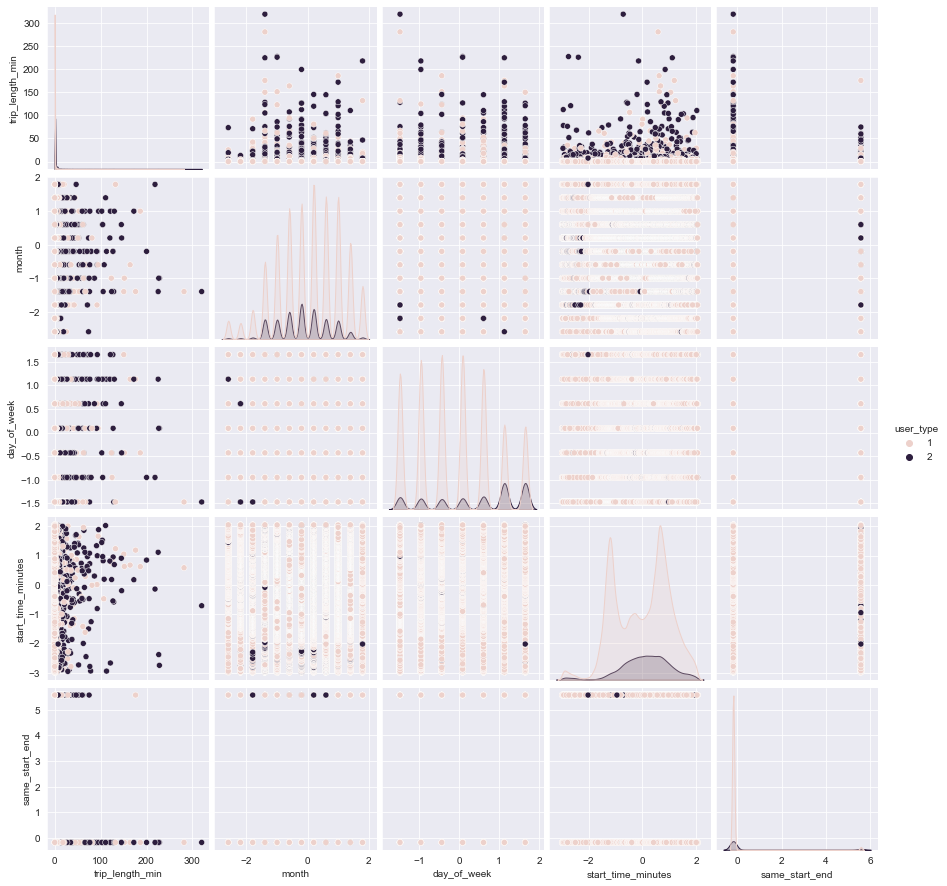

In [28]:
# Takes about 15 minutes to run
sns.pairplot(data=data_scaled_df, hue="user_type")

In [29]:
from sklearn.cluster import KMeans

In [30]:
k_max = 15

In [31]:
# k_max = 10 About 2-3 minutes
# k_max = 20 About 17 minutes
clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters= k + 1)
    model.fit(data_scaled)
    clusters.append(k + 1)
    losses.append(model.inertia_)

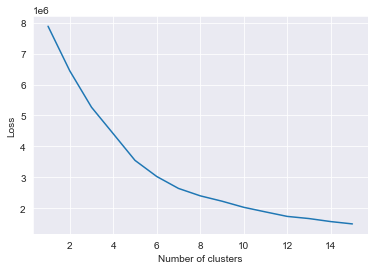

In [32]:
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

(0.0, 10.0)

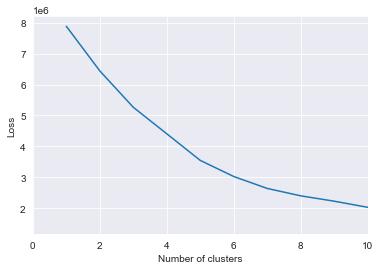

In [33]:
# Zoom in
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.xlim([0,10])

In [57]:
two_means = KMeans(n_clusters=3)
two_means.fit(data_scaled)

two_means.predict(data_scaled)
data_scaled

array([[-0.43498507, -0.06169227, -2.5943313 ,  1.64862751, -2.96155559,
        -0.17941802],
       [-0.43498507, -0.0203293 , -2.5943313 ,  1.64862751, -2.93709273,
        -0.17941802],
       [ 2.29892946,  0.0394172 , -2.5943313 ,  1.64862751, -2.92660865,
        -0.17941802],
       ...,
       [-0.43498507, -0.01113754,  1.79249775,  1.12884047, -1.27361838,
        -0.17941802],
       [-0.43498507,  0.04860897,  1.79249775,  1.12884047, -0.39645018,
        -0.17941802],
       [-0.43498507,  0.03482131,  1.79249775,  1.12884047,  0.88610252,
        -0.17941802]])

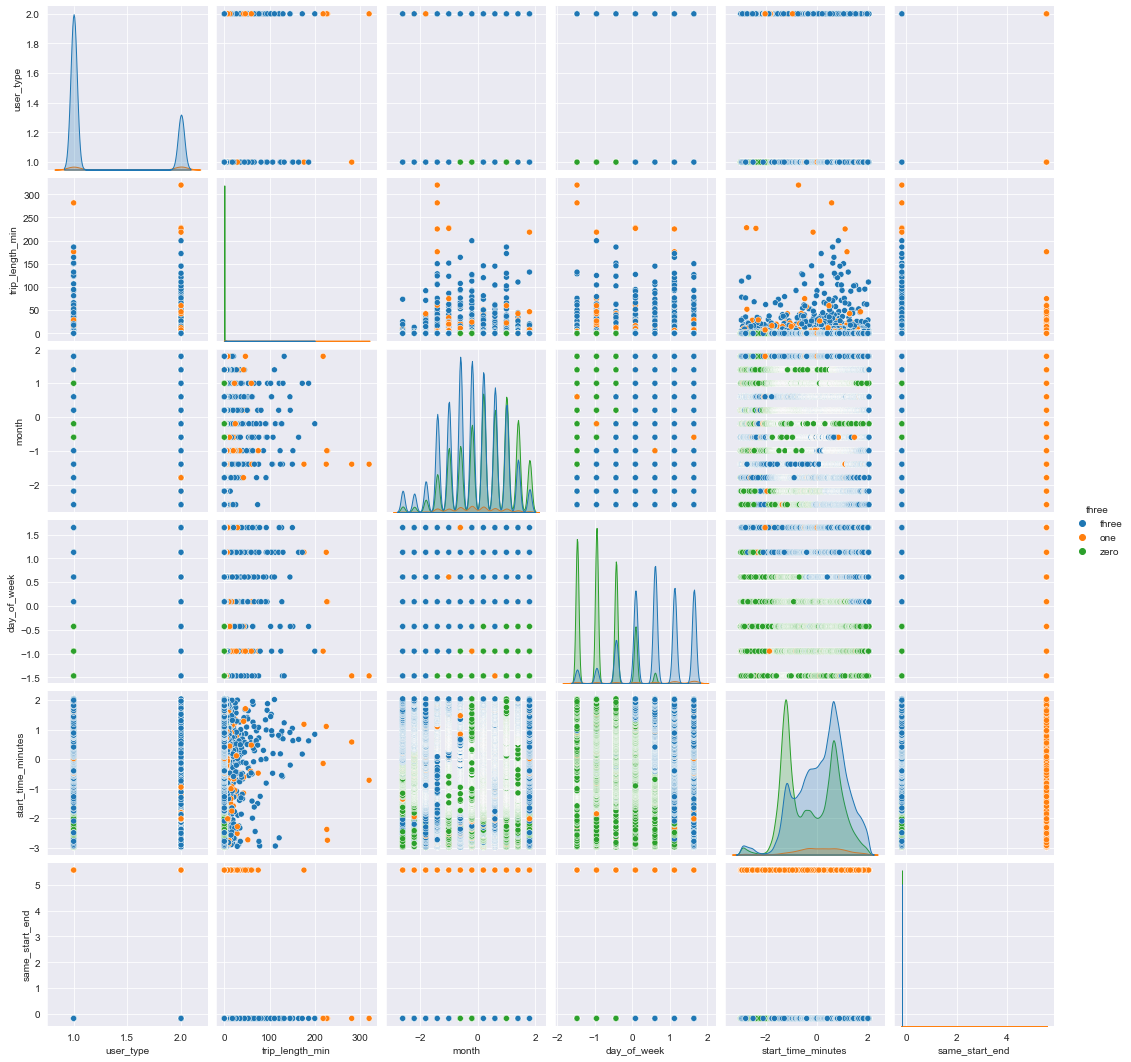

ValueError: could not convert string to float: 'three'

In [71]:
numbers = ["zero", "one", "three"]

user_scaled["two"] = two_means.predict(user_scaled)
user_scaled["two"] = user_scaled["two"].apply(lambda x: numbers[x])
sns.pairplot(data=user_scaled, hue="two")

In [36]:
user_scaled

,user_type,trip_length_min,month,day_of_week,start_time_minutes,same_start_end,three
0,1,-0.061692,-2.594331,1.648628,-2.961556,-0.179418,one
1,1,-0.020329,-2.594331,1.648628,-2.937093,-0.179418,one
2,2,0.039417,-2.594331,1.648628,-2.926609,-0.179418,one
3,1,-0.029521,-2.594331,1.648628,-2.909135,-0.179418,one
4,1,-0.038713,-2.594331,1.648628,-2.877683,-0.179418,one
...,...,...,...,...,...,...,...
1313769,1,-0.066288,1.792498,1.648628,2.000910,-0.179418,one
1313770,1,-0.066288,1.792498,0.609053,0.410824,-0.179418,one
1313771,1,-0.011138,1.792498,1.128840,-1.273618,-0.179418,one
1313772,1,0.048609,1.792498,1.128840,-0.396450,-0.179418,one


# PCA

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
data_pca = pca.fit_transform(data_scaled)

In [38]:
pca.components_

array([[ 0.6439821 ,  0.1881152 , -0.20777663,  0.49966032,  0.19183364,
         0.46932719]])

In [39]:
print(pca.explained_variance_ratio_[0])

0.22196527969735144


In [40]:
pca2 = PCA(n_components=2)
data_pca2 = pca2.fit_transform(data_scaled)

In [41]:
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

[0.22196528 0.16750963]
0.38947491044845095


In [47]:
pca3 = PCA(n_components=3)
data_pca3 = pca3.fit_transform(data_scaled)
print(pca3.explained_variance_ratio_)
print(sum(pca3.explained_variance_ratio_))

[0.22196528 0.16750963 0.16469421]
0.554169118117876


In [46]:
pca4 = PCA(n_components=4)
data_pca4 = pca4.fit_transform(data_scaled)
print(pca4.explained_variance_ratio_)
print(sum(pca4.explained_variance_ratio_))

[0.22196528 0.16750963 0.16469421 0.16321181]
0.7173809248268719


In [48]:
pca5 = PCA(n_components=5)
data_pca5 = pca5.fit_transform(data_scaled)
print(pca5.explained_variance_ratio_)
print(sum(pca5.explained_variance_ratio_))

[0.22196528 0.16750963 0.16469421 0.16321181 0.15579769]
0.8731786123409605


PCA not worth it. When reducing the dimensions by one, only 87% of the original variance is left in the dataset.
Should be at least 95%.